In [1]:
import pandas as pd
import numpy as np

# Pandas display options
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set random seed 
RSEED = 100
# Visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
os.chdir(r'D:\Training\Imarticus\PGA\PGA17\Week14')

In [7]:
data = pd.read_csv('TaxiFare1.csv', parse_dates = ['pickup_datetime']).drop(columns = 'key')

In [8]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1


### Describe the data 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,100171.00,11.32,9.73,-6.00,6.00,8.50,12.50,325.00
pickup_longitude,100171.00,-72.52,10.67,-736.33,-73.99,-73.98,-73.97,351.05
pickup_latitude,100171.00,39.95,8.02,-74.02,40.73,40.75,40.77,1669.58
dropoff_longitude,100171.00,-72.51,11.78,-84.65,-73.99,-73.98,-73.96,1717.00
dropoff_latitude,100171.00,39.97,10.43,-74.01,40.73,40.75,40.77,1989.73
passenger_count,100171.00,1.68,1.30,0.00,1.00,1.00,2.00,9.00


### Univariate Analysis 

C:\Users\Archit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


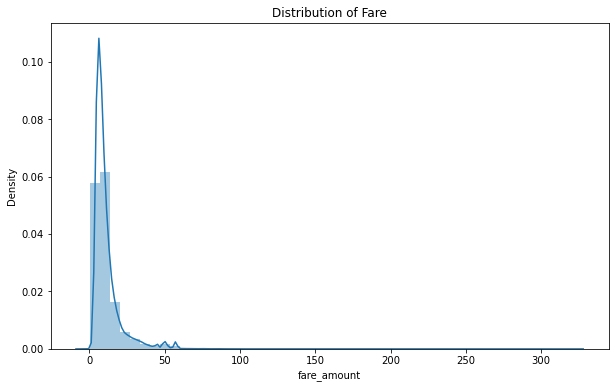

In [11]:
plt.figure(figsize = (10, 6))
sns.distplot(data['fare_amount']);
plt.title('Distribution of Fare');

In [141]:
# print(f"there are {len(data[data['fare_amount']<0])} negatives")

In [142]:
# data[data["fare_amount"]<0], Q1 How many rows where fare =0 ; Q2 How many rows where fare >=100

In [12]:
print("There are {} rows negative in data set".format(len(data[data["fare_amount"]<0])))

There are 8 rows negative in data set


In [13]:
data.shape

(100171, 7)

In [14]:
50/100000

0.0005

In [15]:
print(f"There are {len(data[data['fare_amount'] < 0])} negative fares.")
print(f"There are {len(data[data['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(data[data['fare_amount'] > 100])} fares greater than $100.")

There are 8 negative fares.
There are 3 $0 fares.
There are 38 fares greater than $100.


In [16]:
data = data[data['fare_amount'].between(left = 2.5, right = 100)] 

In [17]:
data.shape

(100119, 7)

In [18]:
100171-100119

52

In [20]:
(52/100171)*100

0.05191123179363289

In [21]:
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 300, 5))).astype(str)

In [22]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1,"(0, 5]"
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1,"(15, 20]"
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2,"(5, 10]"
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1,"(5, 10]"
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1,"(5, 10]"
...,...,...,...,...,...,...,...,...
100166,7.00,2014-09-13 17:05:00+00:00,-73.96,40.78,-73.97,40.76,4,"(5, 10]"
100167,8.90,2012-02-04 18:48:25+00:00,-73.99,40.74,-74.00,40.76,4,"(5, 10]"
100168,6.90,2012-06-22 19:16:00+00:00,-73.96,40.77,-73.97,40.75,1,"(5, 10]"
100169,12.00,2014-01-10 19:12:00+00:00,-73.97,40.75,-73.99,40.74,1,"(10, 15]"


Text(0.5, 1.0, 'Fare Binned')

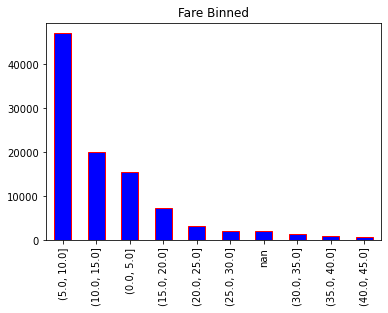

In [23]:
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 50, 5))).astype(str)
data['fare-bin'].value_counts().plot.bar(color = 'b', edgecolor = 'r');
plt.title('Fare Binned')

In [24]:
data['fare-bin'].value_counts()

(5.0, 10.0]     47039
(10.0, 15.0]    19978
(0.0, 5.0]      15515
(15.0, 20.0]     7353
(20.0, 25.0]     3224
(25.0, 30.0]     2020
nan              2005
(30.0, 35.0]     1479
(35.0, 40.0]      822
(40.0, 45.0]      684
Name: fare-bin, dtype: int64

### Variable : Passenger_count

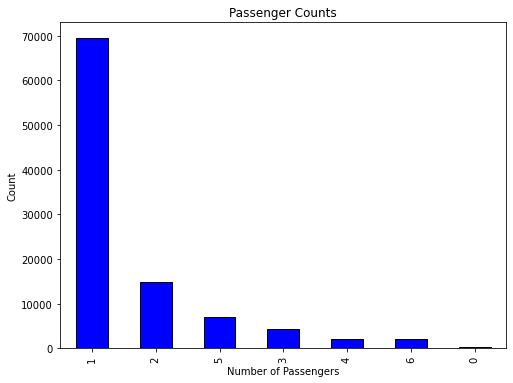

In [25]:
plt.figure(figsize=(8,6))
data['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); 
plt.xlabel('Number of Passengers'); 
plt.ylabel('Count');

In [154]:
# data["passenger_count"].describe()

<AxesSubplot:ylabel='passenger_count'>

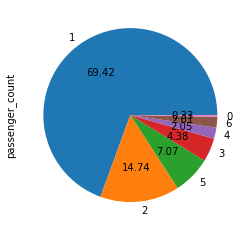

In [26]:
data["passenger_count"].value_counts().plot(kind="pie", autopct="%.2f")

In [156]:
# print(f'Initial Observations: {data.shape[0]}')

In [28]:
data.describe(percentiles=[0.01, .02, .025, .05, 0.1, .95, .96,.97,.975, .98, .99]).T

,count,mean,std,min,1%,2%,2.5%,5%,10%,50%,95%,96%,97%,97.5%,98%,99%,max
fare_amount,100119.00,11.27,9.34,2.50,3.30,3.50,3.70,4.10,4.50,8.50,30.00,33.07,37.80,42.00,45.22,52.00,100.00
pickup_longitude,100119.00,-72.52,10.66,-736.33,-74.01,-74.01,-74.01,-74.01,-74.00,-73.98,-73.87,-73.86,-73.79,-73.78,-73.68,0.00,351.05
pickup_latitude,100119.00,39.95,8.01,-74.02,0.00,40.61,40.64,40.70,40.72,40.75,40.79,40.79,40.79,40.80,40.80,40.81,1669.58
dropoff_longitude,100119.00,-72.51,11.78,-84.65,-74.02,-74.01,-74.01,-74.01,-74.00,-73.98,-73.88,-73.86,-73.81,-73.78,-73.71,0.00,1717.00
dropoff_latitude,100119.00,39.98,10.43,-74.01,0.00,40.59,40.64,40.69,40.71,40.75,40.79,40.80,40.80,40.81,40.81,40.83,1989.73
passenger_count,100119.00,1.68,1.30,0.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,6.00,6.00,6.00


In [29]:
# Absolute difference in latitude and longitude
data['abs_lat_diff'] = (data['dropoff_latitude'] - data['pickup_latitude']).abs()
data['abs_lon_diff'] = (data['dropoff_longitude'] - data['pickup_longitude']).abs()

It does seem that the rides with a larger absolute difference in both longitude and latitude tend to cost more. To capture both differences in a single variable, we can add up the two differences in latitude and longitude and also find the square root of the sum of differences squared. The former feature would be called the Manhattan distance - or l1 norm - and the latter is called the Euclidean distance - or l2 norm. Both of these distances are specific examples of the general Minkowski distance.

###### Manhattan and Euclidean Distance
The Minkowski Distance between two points is expressed as:

D(X,Y)=(∑i=1n|xi−yi|p)1/p

if p = 1, then this is the Manhattan distance and if p = 2 this is the Euclidean distance. You may also see these referred to as the l1 or l2 norm where the number indicates p in the equation.

I should point out that these equations are only valid for actual distances in a cartesian coordinate system and here we only use them to find relative distances. To find the actual distances in terms of kilometers, we have to work with the latitude and longitude geographical coordinate system. This will be done later using the Haversine formula.

In [30]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [33]:
# (23,25); (45,35)
minkowski_distance(23,45, 25, 35, 1)

32.0

In [34]:
minkowski_distance(0, 3, 0, 4, 2) # Euclidean Distance

5.0

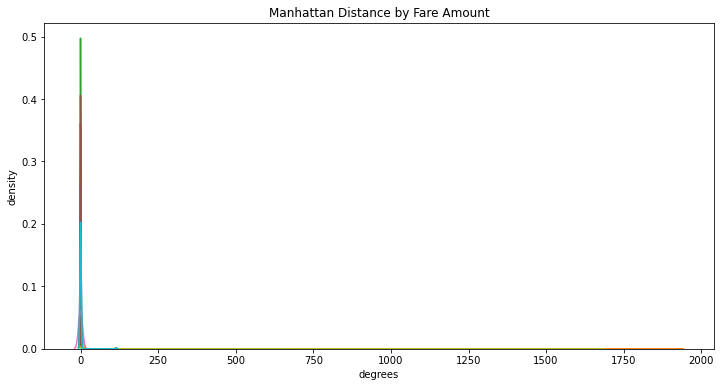

In [35]:
data['manhattan'] = minkowski_distance(data['pickup_longitude'], 
                                       data['dropoff_longitude'],
                                       data['pickup_latitude'],
                                       data['dropoff_latitude'], 1)




# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['manhattan'], label = f'{f}');

plt.xlabel('degrees'); plt.ylabel('density')
plt.title('Manhattan Distance by Fare Amount');

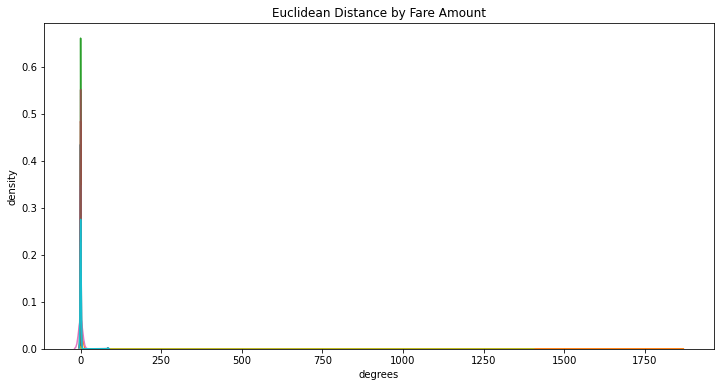

In [36]:
data['euclidean'] = minkowski_distance(data['pickup_longitude'], data['dropoff_longitude'],
                                       data['pickup_latitude'], 
                                       data['dropoff_latitude'], 2)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['euclidean'], label = f'{f}');

plt.xlabel('degrees'); 
plt.ylabel('density')
plt.title('Euclidean Distance by Fare Amount');

In [38]:
data.groupby('fare-bin')['euclidean'].agg(['mean', 'count', "max", "min"])

,mean,count,max,min
fare-bin,,,,
"(0.0, 5.0]",0.27,15515,360.30,0.00
"(10.0, 15.0]",0.28,19978,1863.76,0.00
"(15.0, 20.0]",0.21,7353,84.48,0.00
"(20.0, 25.0]",0.27,3224,84.48,0.00
"(25.0, 30.0]",0.43,2020,84.47,0.00
"(30.0, 35.0]",0.23,1479,84.47,0.00
"(35.0, 40.0]",1.27,822,662.46,0.00
"(40.0, 45.0]",0.65,684,84.47,0.00
"(5.0, 10.0]",0.14,47039,1402.97,0.00


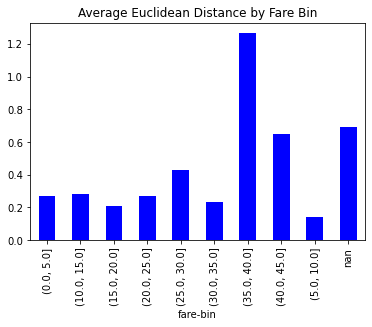

In [39]:
data.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b');
plt.title('Average Euclidean Distance by Fare Bin');

There is a very clearly relationship between the fare bin and the average distance of the trip! This should give us confidence that this feature will be useful to a model.

Another plot we can make is the passenger count distribution colored by the fare bin.

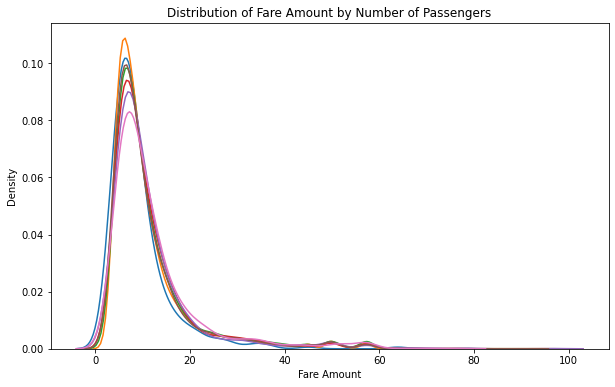

In [40]:
plt.figure(figsize = (10, 6))

for p, grouped in data.groupby('passenger_count'):
    sns.kdeplot(grouped['fare_amount'], label = f'{p} passengers');
    
plt.xlabel('Fare Amount'); plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers');

###### There does not appear to be much difference between the number of passengers. To get a more accurate picture, we can calculate the actual stats.

In [41]:
data.groupby('passenger_count')['fare_amount'].agg(['mean', 'count'])

,mean,count
passenger_count,,
0,9.23,326
1,11.13,69503
2,11.82,14762
3,11.44,4384
4,11.51,2053
5,11.22,7082
6,12.21,2009


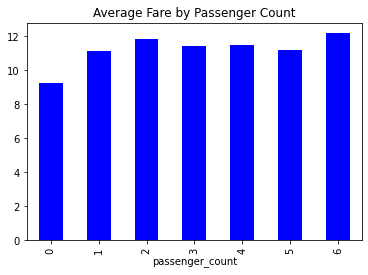

In [42]:
data.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

There is a small but noticeable difference in the average fare by the number of passengers.

### Calculate Distance between points using Haversine distance

In [43]:
data.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'fare-bin',
       'abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean'],
      dtype='object')

In [44]:
y=data["fare_amount"]
X=data[['abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean','passenger_count']]

In [45]:
X.corr()

,abs_lat_diff,abs_lon_diff,manhattan,euclidean,passenger_count
abs_lat_diff,1.00,0.29,0.82,0.86,-0.00
abs_lon_diff,0.29,1.00,0.78,0.73,-0.00
manhattan,0.82,0.78,1.00,0.99,-0.00
euclidean,0.86,0.73,0.99,1.00,-0.00
passenger_count,-0.00,-0.00,-0.00,-0.00,1.00


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=99)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 5, 
                                      bootstrap = True,n_jobs = -1, criterion="mae")

# Train on data
random_forest.fit(X_train, y_train)

KeyboardInterrupt: 

In [222]:
print("R^2 is train: ", random_forest.score(X_train, y_train))
print("R^2 is test: ", random_forest.score(X_test, y_test))

R^2 is train:  0.790463725049638
R^2 is test:  0.7593218021154426


In [223]:
random_forest.predict(X_train)

array([ 5.55597384, 13.72811347, 14.34640992, ...,  5.55597384,
       10.35693108,  5.55597384])

In [224]:
print("RMSE of Train: ", np.sqrt(np.mean((y_train-random_forest.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-random_forest.predict(X_test))**2) ))

RMSE of Train:  4.2731525037725335
RMSE of Test:  4.594262817582914


In [225]:
print("MAE of Train: ", np.mean(np.abs((y_train-random_forest.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-random_forest.predict(X_test))) ))

MAE of Train:  2.328952838394527
MAE of Test:  2.3825812992655


In [227]:
random_forest.feature_importances_

array([5.29763372e-03, 4.39930742e-02, 1.93230760e-02, 9.31316589e-01,
       6.96270975e-05])

In [228]:
X_train.columns

Index(['abs_lat_diff', 'abs_lon_diff', 'manhattan', 'euclidean',
       'passenger_count'],
      dtype='object')

In [229]:
print("R^2 is train: ", random_forest.score(X_train, y_train))
print("R^2 is test: ", random_forest.score(X_test, y_test))
print("MAE of Train: ", np.mean(np.abs((y_train-random_forest.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-random_forest.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-random_forest.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-random_forest.predict(X_test))**2) ))


R^2 is train:  0.790463725049638
R^2 is test:  0.7593218021154426
MAE of Train:  2.3289528383945264
MAE of Test:  2.3825812992654996
RMSE of Train:  4.2731525037725335
RMSE of Test:  4.594262817582914


In [230]:
from sklearn.tree import DecisionTreeRegressor

In [231]:
m1=DecisionTreeRegressor(max_depth=5)
m1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [232]:
print("R^2 is train: ", m1.score(X_train, y_train))
print("R^2 is test: ", m1.score(X_test, y_test))
print("MAE of Train: ", np.mean(np.abs((y_train-m1.predict(X_train))) ))
print("MAE of Test: ", np.mean(np.abs((y_test-m1.predict(X_test))) ))
print("RMSE of Train: ", np.sqrt(np.mean((y_train-m1.predict(X_train))**2) ))
print("RMSE of Test: ", np.sqrt(np.mean((y_test-m1.predict(X_test))**2) ))

R^2 is train:  0.7861162864082163
R^2 is test:  0.7509941618957613
MAE of Train:  2.35654346306407
MAE of Test:  2.4174089360633606
RMSE of Train:  4.317254402900566
RMSE of Test:  4.673069336727475
